In [35]:
import pandas as pd
from scipy import stats

In [36]:
data_frame = pd.read_csv('datasets/S&P500_EOD-Price.csv')
data_frame = data_frame.dropna(axis=1)

data_frame.head()

,Date,APA,MTCH,GEN,DXC,EG,BKR,AMD,HON,BALL,...,SNPS,SWKS,ZION,TTWO,VRTX,TRMB,ZBRA,LNT,BBWI,WBA
0,2000-01-03,14.772727,7.527071,7.109375,46.327873,21.8750,20.2500,15.500,54.044136,2.488281,...,32.781250,31.406250,55.5000,9.125000,18.78125,4.145833,25.027779,13.40625,16.395514,28.5625
1,2000-01-04,14.123377,6.921444,6.781250,46.017365,21.8125,20.2500,14.625,53.090767,2.406250,...,30.437500,29.562500,52.8125,8.875000,17.28125,4.072917,24.666668,13.40625,16.067099,27.5000
2,2000-01-05,14.529221,6.661890,6.375000,42.788074,23.2500,20.3750,15.000,52.375736,2.449219,...,30.703125,30.328125,52.7500,8.833333,17.00000,3.817708,25.138889,14.06250,15.839733,27.8125
3,2000-01-06,15.909091,6.938748,6.007813,43.409092,24.3125,22.3125,16.000,53.388695,2.488281,...,28.468750,27.375000,53.5000,8.750000,16.75000,3.854167,23.777779,14.06250,15.587106,27.0000
4,2000-01-07,15.854978,6.904141,6.484375,43.315941,25.6250,23.8125,16.250,56.248802,2.417969,...,28.750000,30.187500,53.6250,9.000000,18.21875,3.854167,23.513889,14.25000,15.688157,27.6875


In [37]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame['Year'] = data_frame["Date"].dt.year

processing_years = [year for year in range(2000, 2025)]
data_frame_annual_returns = []

for year in processing_years:
    filtered_data = data_frame[data_frame['Year'] == year]
    for column in filtered_data.columns:
        if column not in ["Date", "Year"]:
            first_value = filtered_data[column].iloc[0]
            last_value = filtered_data[column].iloc[-1]
            annual_return = (last_value - first_value) / first_value * 100
            annual_returns = [(((filtered_data[column].iloc[i] - filtered_data[column].iloc[0]) / filtered_data[column].iloc[0]) * 100) for i in range(len(filtered_data))]
            
            relative_percentile = stats.percentileofscore(annual_returns, annual_return)
            
            data_frame_annual_returns.append({'Stock': column, 'Year': year, 'Annual_Return': annual_return, 'Relative_Percentile': relative_percentile})


result_df = pd.DataFrame(data_frame_annual_returns)

In [38]:
result_df.head(100)

,Stock,Year,Annual_Return,Relative_Percentile
0,APA,2000,105.311369,99.206349
1,MTCH,2000,-28.505749,22.420635
2,GEN,2000,-41.318681,2.777778
3,DXC,2000,-35.522790,0.396825
4,EG,2000,227.428571,98.412698
...,...,...,...,...
95,WEC,2000,18.360656,98.809524
96,ECL,2000,14.593698,97.817460
97,LEG,2000,-7.902736,64.285714
98,NEE,2000,73.939394,99.206349


C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


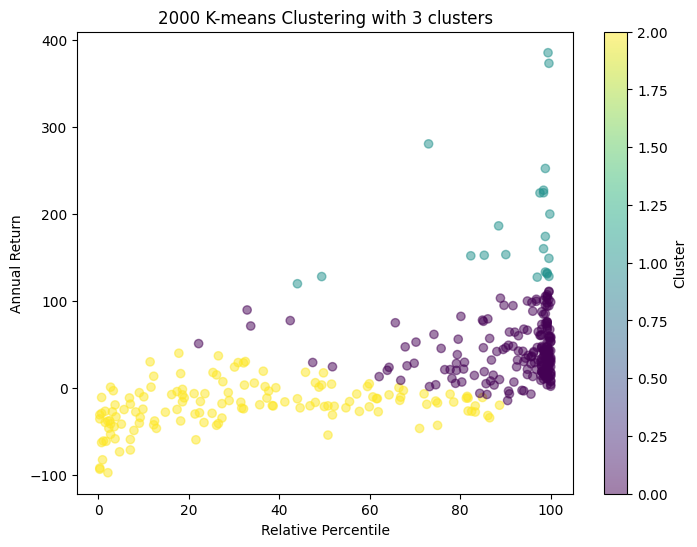

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


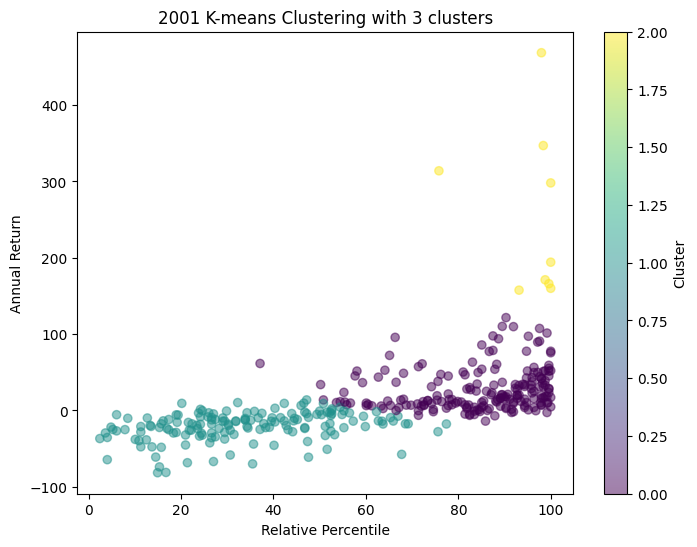

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


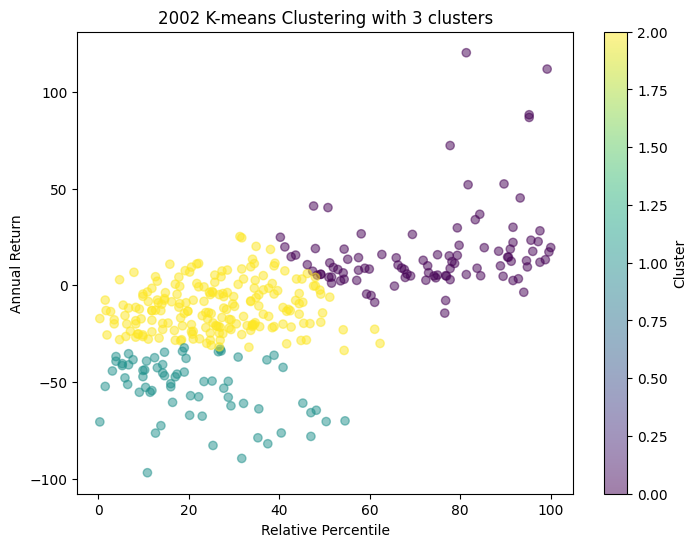

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


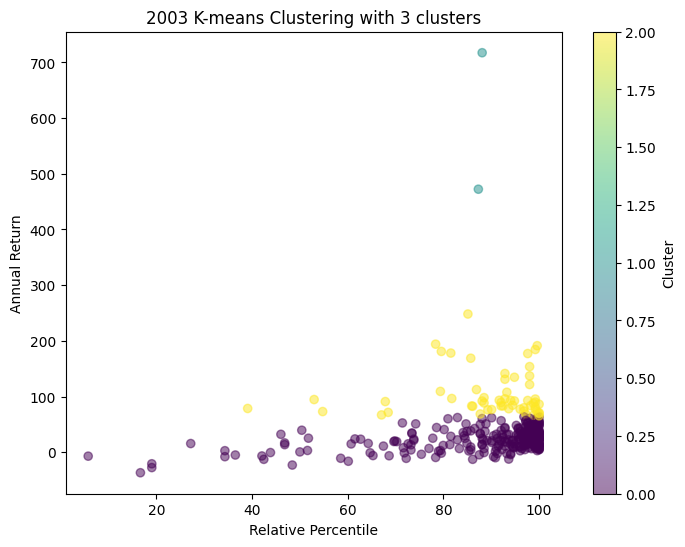

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


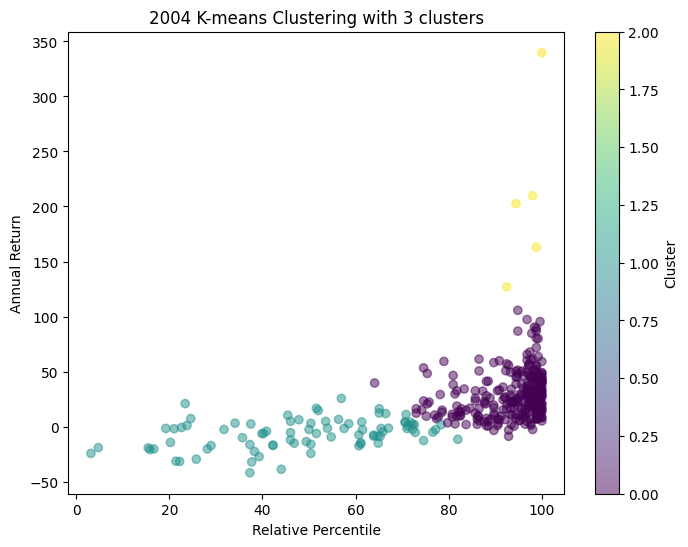

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


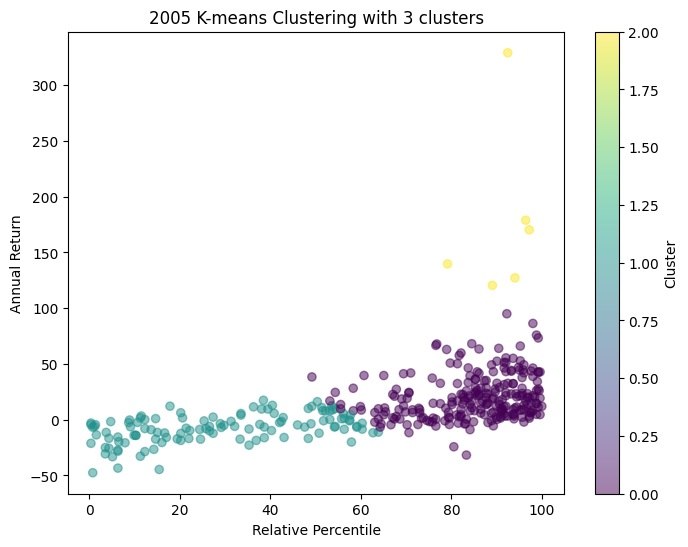

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


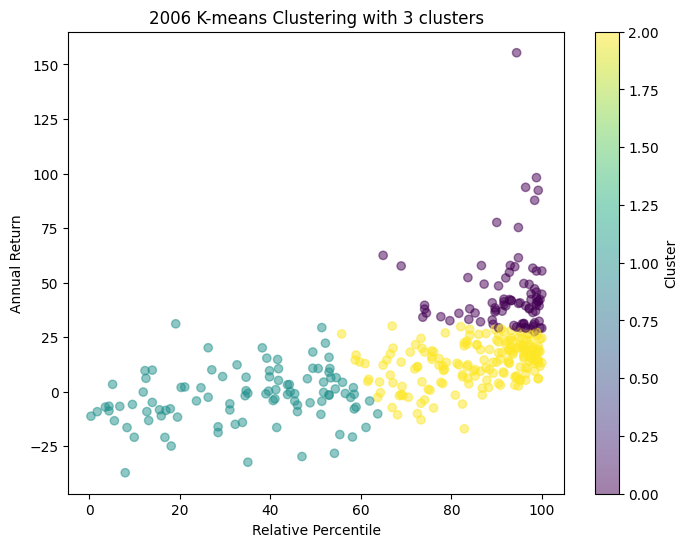

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


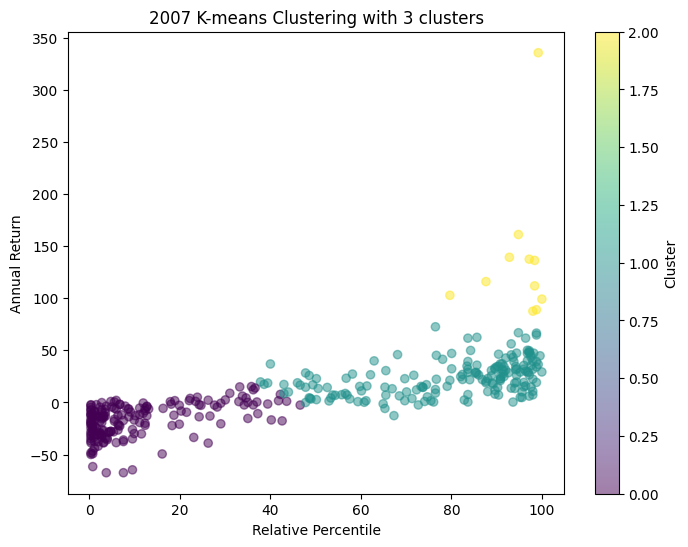

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


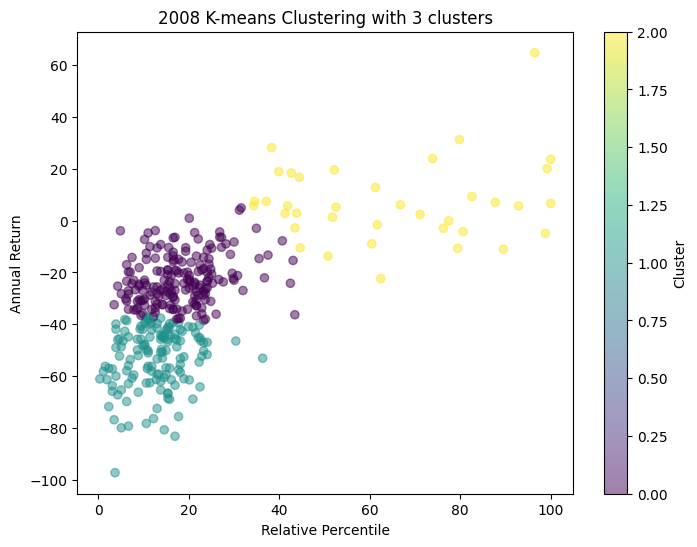

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


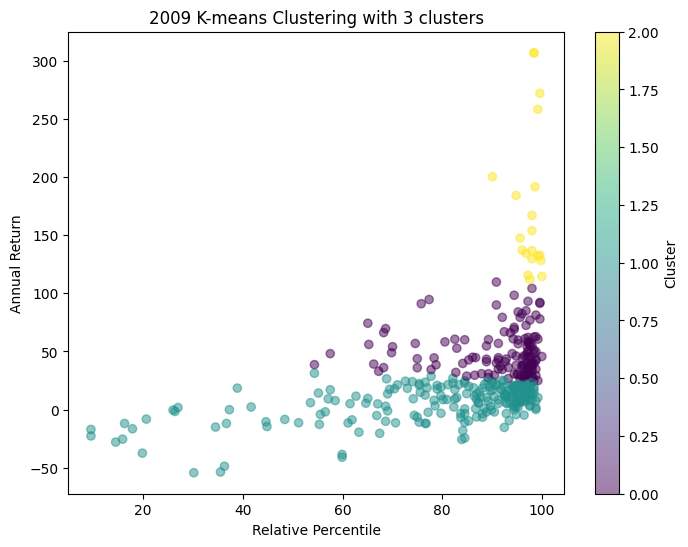

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


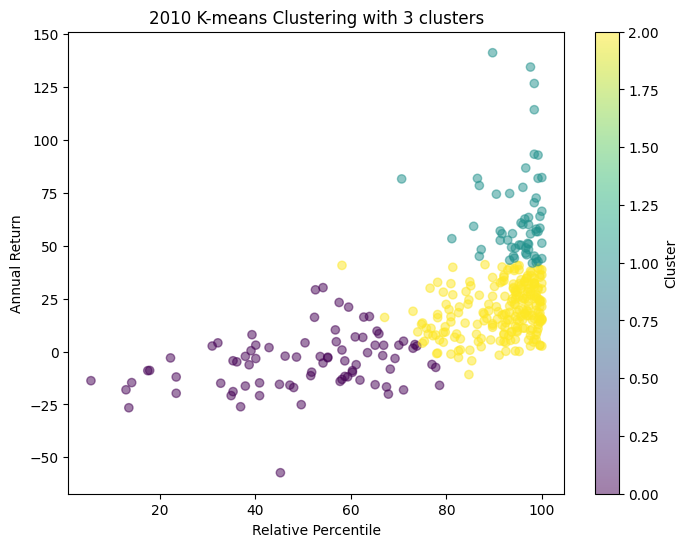

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


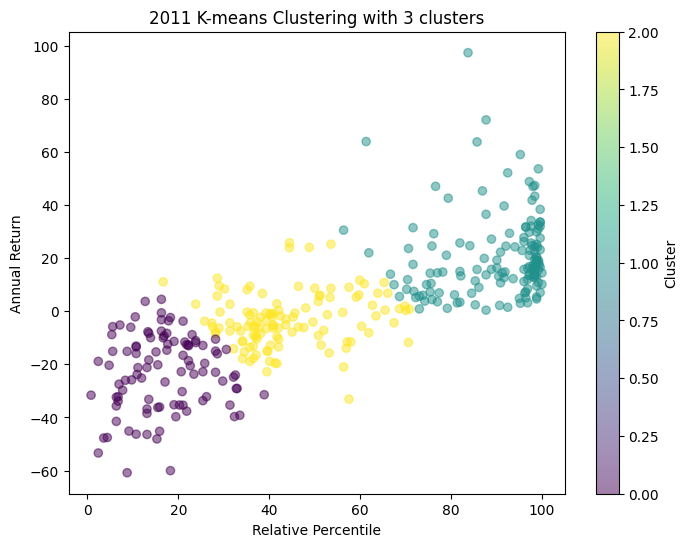

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


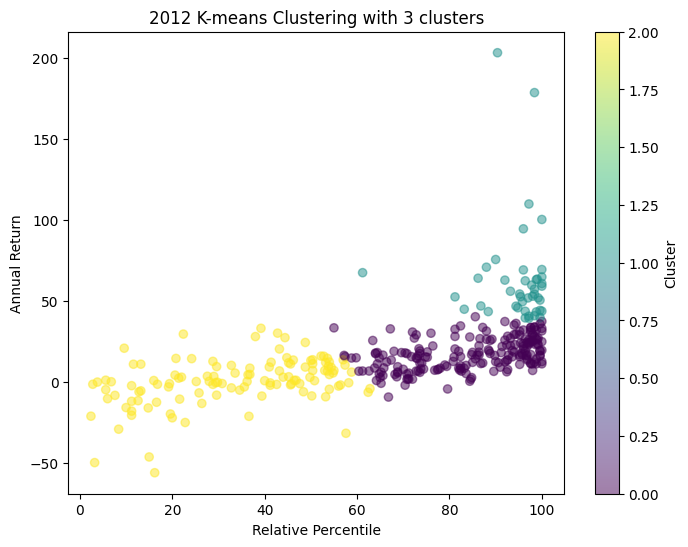

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


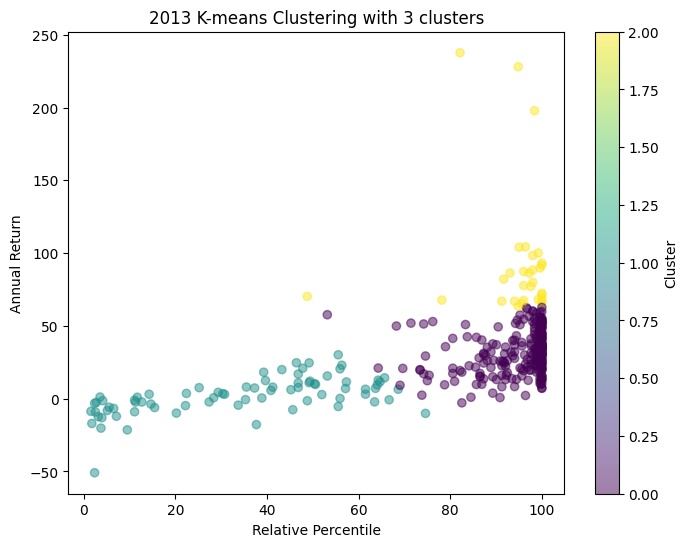

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


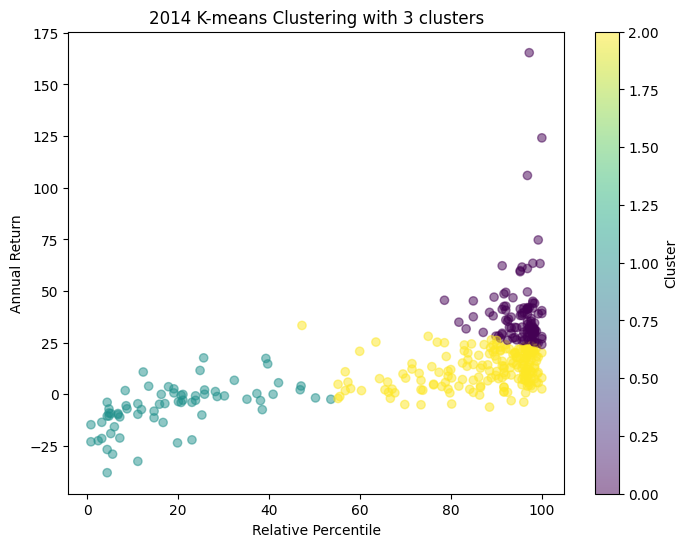

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


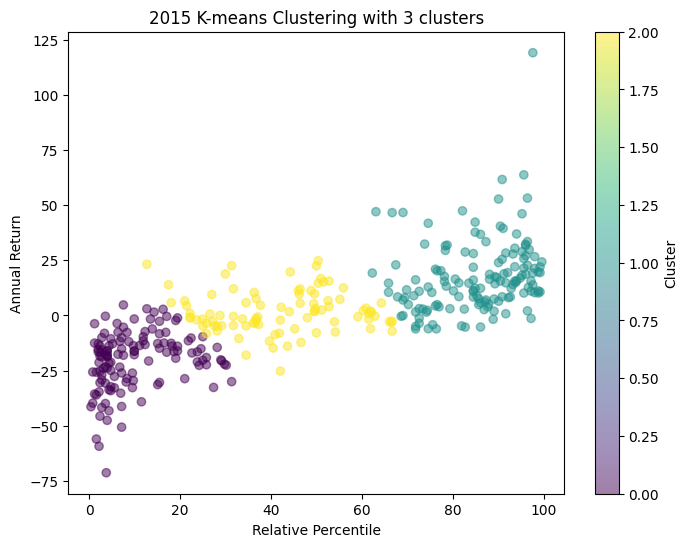

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


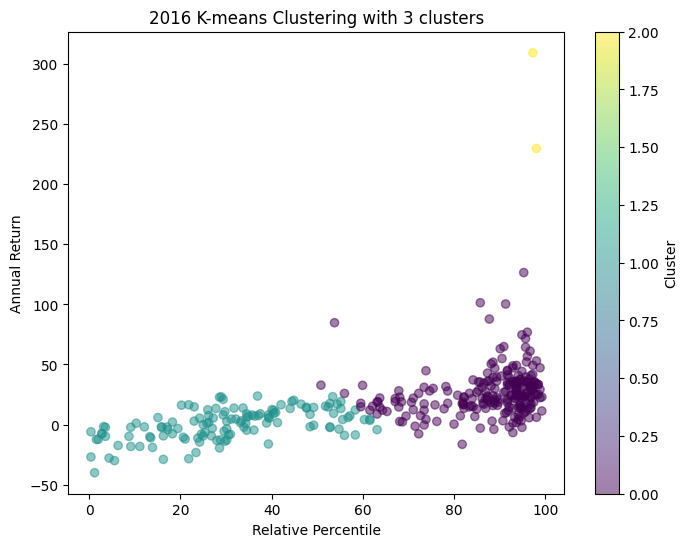

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


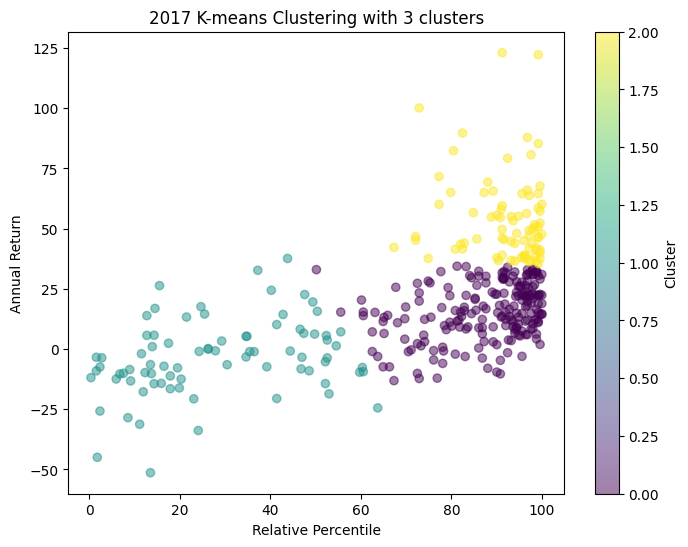

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


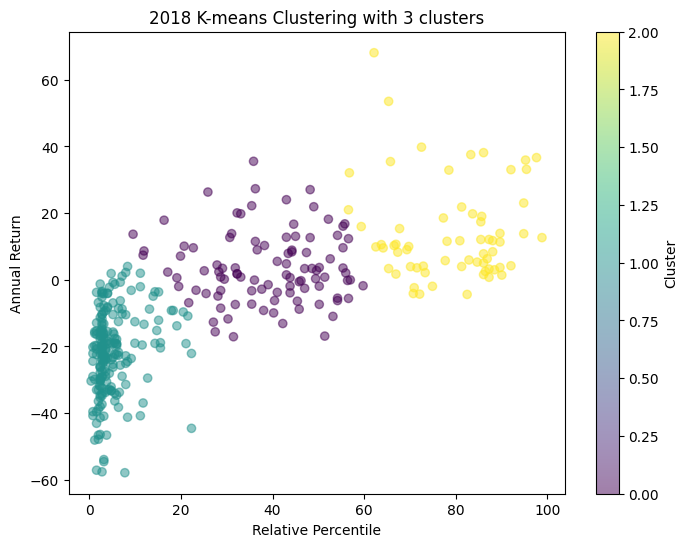

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


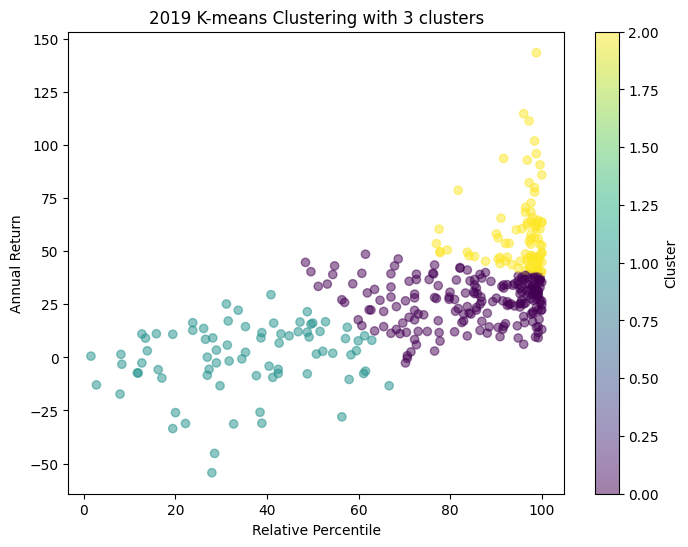

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


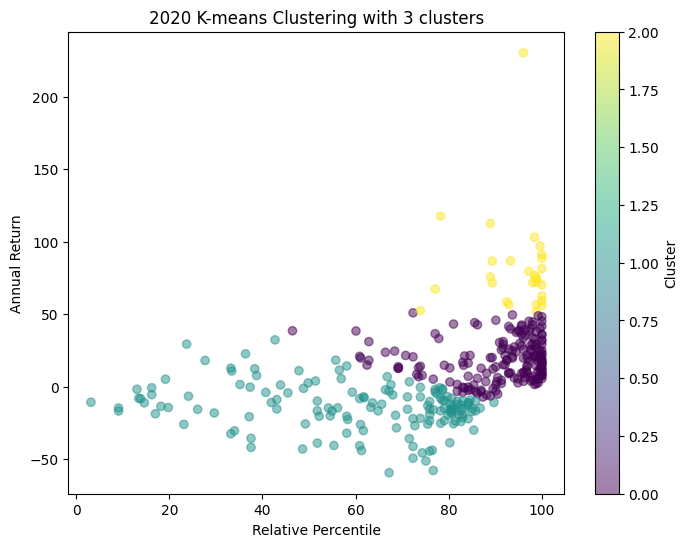

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


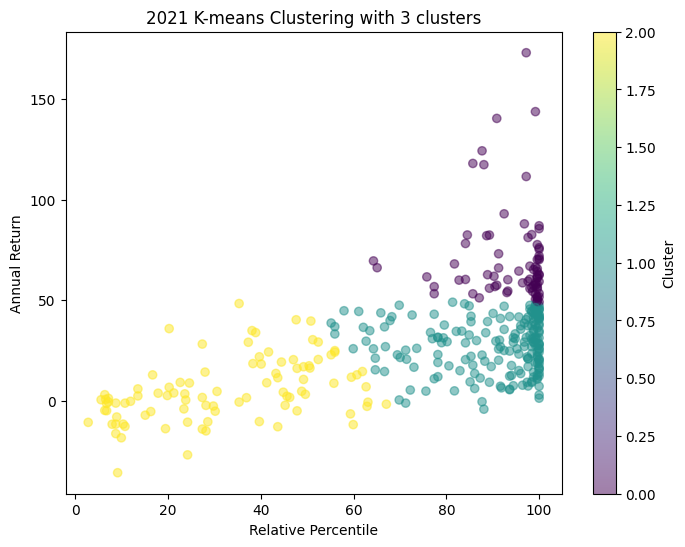

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


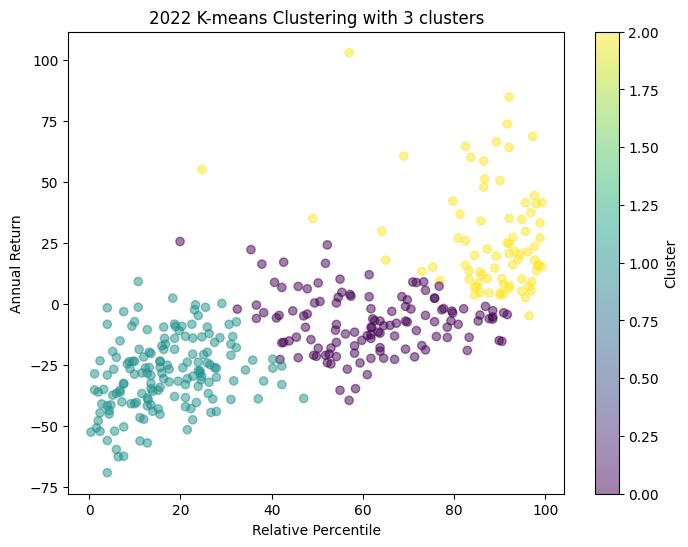

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


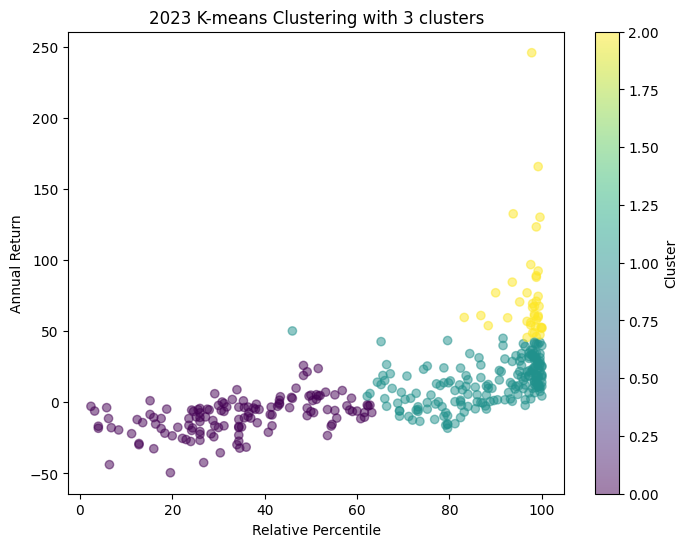

C:\Users\cigan\AppData\Local\Temp\ipykernel_1816\1099106443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


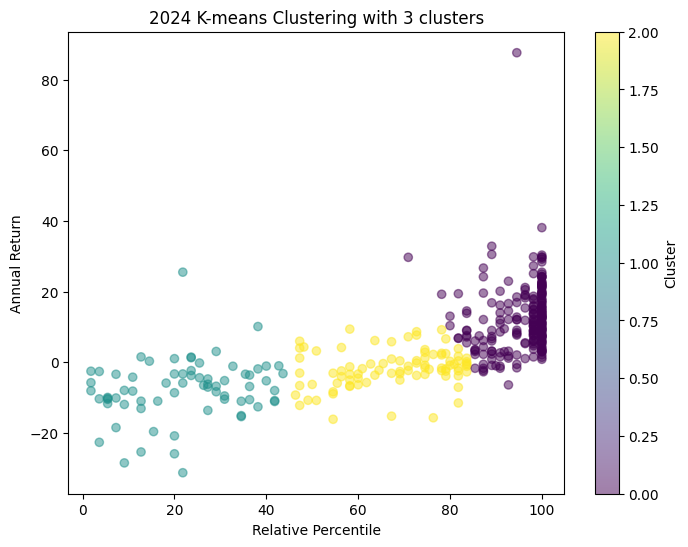

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

for year in processing_years:
    filtered_data = result_df[result_df['Year'] == year]
    clustering_data = filtered_data[['Annual_Return', 'Relative_Percentile']]
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans.fit(clustering_data)
    

    filtered_data['Cluster'] = kmeans.labels_
    plt.figure(figsize=(8, 6))
    plt.scatter(filtered_data['Relative_Percentile'], filtered_data['Annual_Return'], c=filtered_data['Cluster'], cmap='viridis', alpha=0.5)
    plt.title(str(year) + ' K-means Clustering with 3 clusters')
    plt.xlabel('Relative Percentile')
    plt.ylabel('Annual Return')
    plt.colorbar(label='Cluster')

    plt.savefig(str(year) + '_plot.png')
    plt.show() 

In [7]:
result_df_filtered_data_2024 = result_df[result_df['Year'] == 2024]
result_df_filtered_data_2024.head()

,Stock,Year,Annual_Return,Relative_Percentile,Cluster
8760,APA,2024,-0.064248,92.727273,1
8761,MTCH,2024,-0.010986,40.000000,2
8762,GEN,2024,-0.052655,40.000000,2
8763,DXC,2024,-0.070521,27.272727,0
8764,EG,2024,0.080382,98.181818,1


In [13]:
mcap_df = pd.read_excel('datasets/MCAP_2024.xlsx')
mcap_df.head()

,Ticker,Description,Sector,Mcap
0,AAPL,Apple Inc.,Electronic Technology,2728017215293
1,MSFT,Microsoft Corporation,Technology Services,2351371643107
2,GOOG,Alphabet Inc.,Technology Services,"1,611,856,497,958"
3,GOOGL,Alphabet Inc.,Technology Services,"1,610,343,852,181"
4,AMZN,"Amazon.com, Inc.",Retail Trade,"1,366,884,251,763"


In [44]:
result_df_filtered_data_2024

,Stock,Year,Annual_Return,Relative_Percentile,Cluster
8760,APA,2024,-0.064248,92.727273,1
8761,MTCH,2024,-0.010986,40.000000,2
8762,GEN,2024,-0.052655,40.000000,2
8763,DXC,2024,-0.070521,27.272727,0
8764,EG,2024,0.080382,98.181818,1
...,...,...,...,...,...
9120,TRMB,2024,0.215253,100.000000,1
9121,ZBRA,2024,0.066535,89.090909,1
9122,LNT,2024,-0.059368,55.454545,2
9123,BBWI,2024,0.074860,98.181818,1


In [45]:
result_df.head()

,Stock,Year,Annual_Return,Relative_Percentile,Cluster
0,APA,2000,1.053114,99.206349,1
1,MTCH,2000,-0.285057,22.420635,0
2,GEN,2000,-0.413187,2.777778,0
3,DXC,2000,-0.355228,0.396825,0
4,EG,2000,2.274286,98.412698,1
